In [15]:
# Procedure to calculate the dry deposition flux of particles based in data of weather and particle counts

# To run this script, it is necessary the following data sets (csv type):
# 1. Weather dataset (csv file, with one minute frequency data regarding: timestamp, temperature, relative humidity, wind speed and wind direction). Example: "S6_Minute data.csv"
# 2. Particle counts dataset. Example: "OPC raw data.csv"

# Version 1  (last updated: 05/09/2022)

In [16]:
# Create a working folder and enter in it

In [17]:
# 1. Check which is the folder you are on using "pwd"

In [18]:
pwd

'C:\\Users\\nunocanha\\Desktop\\Ambiente de Trabalho - Pessoal\\ULeeds_Python\\Data analysis\\Consolidated script\\2017'

In [19]:
#2. If you are not in your working folder, enter in it using the command "cd"

In [20]:
cd C:\\Users\\Nuno Canha\\Desktop\\Python\\Jenine Paper\\Analysis\\2017\\14Octo21_Individual values\\DDV calculation

[WinError 3] The system cannot find the path specified: 'C:\\\\Users\\\\Nuno Canha\\\\Desktop\\\\Python\\\\Jenine Paper\\\\Analysis\\\\2017\\\\14Octo21_Individual values\\\\DDV calculation'
C:\Users\nunocanha\Desktop\Ambiente de Trabalho - Pessoal\ULeeds_Python\Data analysis\Consolidated script\2017


In [21]:
# Your raw data file should be "csv" type.

In [22]:
# Upload the analysis packages

In [23]:
import pandas as pd
import numpy as np

In [24]:
import matplotlib.pyplot as plt
from datetime import datetime

In [25]:
# Basic x-y plot
# this command is for the graphs to appear in the notebook
%matplotlib inline

In [26]:
# Loading the data
name = input('What data is being analised?')

What data is being analised? BB 2017


In [27]:
data = pd.read_csv("WD_Minute data.csv", delimiter=",", na_values=['-999.0'])

# No values (-999.0) were replaced by NaN in order to not interfere with the analysis

data['Date'] = data['Date'].astype('datetime64')

# Check the data format:
data.dtypes

Date    datetime64[ns]
T              float64
RH             float64
WD             float64
WS             float64
dtype: object

In [28]:
# Remark: "Date" should be the type "datetime64[ns]". If so, create a new dataset with "Date" as index:

data1 = data.set_index('Date')

data1

,T,RH,WD,WS
Date,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324
...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114


In [29]:
# To calculate the percentage of wind speed below 1 m/s:
neg=data1[['WS']].agg(lambda x: sum(x < 1)).sum()
neg

total=len(data1['WS'])
pneg = neg/total*100
print("The percentage of wind speed values below 1 m/s is", pneg.round(0).astype(int), "%." )

The percentage of wind speed values below 1 m/s is 4 %.


In [30]:
# How to create a single figure with all graphs of the parameters:

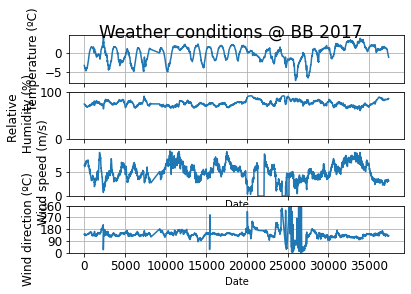

In [31]:
fig1, (ax1, ax2, ax3, ax4) = plt.subplots(4, sharex=True)

fig1.suptitle('Weather conditions @ ' + name, y=0.92,fontsize=17)
ax1.plot(data['T'])
ax1.set_ylabel('Temperature (ºC)', fontsize=12)
ax1.tick_params(axis='x', labelsize=12 )
ax1.tick_params(axis='y', labelsize=12 )
ax1.grid(True)

ax2.plot(data['RH'])
ax2.set_ylabel('Relative \n Humidity (%)', fontsize=12)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.set_ylim(0,100)
ax2.grid(True)

ax3.plot(data['WS'])
ax3.set_ylabel('Wind speed (m/s)', fontsize=12)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.set_xlabel('Date')
ax3.set_ylim(0,)
ax3.grid(True)

ax4.plot(data['WD'])
ax4.set_ylabel('Wind direction (ºC)', fontsize=12)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.set_xlabel('Date')
ax4.set_ylim(0,360)
plt.yticks(np.arange(0,361,90))
ax4.grid(True)


# To save the figure
plt.savefig('Fig1 - Weather conditions @ ' + name)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

In [32]:
# How to calculate the friction velocity based in the wind speed:

data1['ustar']= 0.0015*(data1['WS']**2)+0.0099*data1['WS']+0.062

data1

,T,RH,WD,WS,ustar
Date,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597
...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374


In [33]:
# Definition of function to calculate the kinematic viscosity of air (viscair, in m2/s, for air temperatures between -173 and 227 ºC) as a function of air temperature T (in ºC), following the equation of Andreas, 1989:

# va(T)=1.326 × (10^-5) (1 + 6.542 × (10^-3) × T) + 8.301 × (10^-6) × T^2) -4.840 × ( 10^-9) × T^3 )  


def viscair(T):
    """
    Function to calculate the kinematic viscosity (in m2/s)
    Parameters
    -------
    : int | float
        Input air temperature in celsius (should be a number)
    Returns
    -------
    kinematic viscosity (in m2/s) (float)
    """
    
    # Convert the Fahrenheit into Celsius and return it
    viscair_result = 1.326e-5*(1 + 6.542e-3*T + 8.301e-6*T**2 - 4.84e-9*T**3)
    return viscair_result

In [34]:
data1['viscair'] = viscair(data1['T'])
data1

,T,RH,WD,WS,ustar,viscair
Date,,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013
...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013


In [35]:
# Constants used in the calculation of the dry deposition velocity (m/s)
g = 9.81            # Gravity (m/s2)
pden = 2500 # Particle density for dust particles (kg/m3)

In [36]:
# step 1: calculate the particle gravitational settling velocity, vg 

def vg(D, T, viscair):
    """
    Function to calculate vg
    Parameters
    : input:
        D - diameter in micrometers
        T - air temperature (in Kelvins)
        viscair - kinematic viscosity (m2/s)
        
    Returns
    vg (in m/s)
    """
    if D >= 1: 
        C = 1
        vg_result = (g*pden*((D*10**-6)**2)*C)/(18*viscair)
    elif D<1:
        C = 1 + ((6.21e-4)*(273.15+T))/D
        vg_result = (g*pden*((D*10**-6)**2)*C)/(18*viscair)
    return vg_result


# For particles with diameter below 1 µm, C (Cunningham slip correction) should be calculated as follows:

# C  =1 + (6.21×10^(-4) * T)/dp, where dp is the particle diameter (in µm) and T is the air temperature (in Kelvin). 

# Reference:
# Chapter 4 - ENVIRONMENTAL PROTECTION AGENCY Student Manual, in: APTI 4 1 3 CONTROL OF PARTICULATE MATTER EMISSIONS, 5TH EDITION, n.d. 
# https://www.apti-learn.net/lms/register/display_document.aspx?dID=261

In [37]:
# step 2: calculate the X parameter

beta = 1 # Unitiy constant (Hoppel 2002)
k = 0.4 # Von karmen constant

# The X parameter is defined by the following equation (described by Hoppel (2002) in the following equation: X = beta x k x u*
# where u* is the friction velocity (m/s), as calculated previously.

# Reference:
# W.A. Hoppel, G.M. Frick, J.W. Fitzgerald, Surface source function for sea-salt aerosol and aerosol dry deposition to the ocean surface, 
# J. Geophys. Res. Atmos. 107 (2002) AAC 7-1-AAC 7-17. doi:10.1029/2001JD002014.

def X(ustar):
        """
    Function to X parameter
    Parameters
    : input:
        ustar - Friction velocity speed (m/s)
        
    Returns
    X
    """
        X_result = k*beta*ustar
        return X_result

In [38]:
data1['X_parameter'] = X(data1['ustar'])
data1

,T,RH,WD,WS,ustar,viscair,X_parameter
Date,,,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013,0.073793
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013,0.073804
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013,0.073816
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013,0.073827
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013,0.073839
...,...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013,0.042980
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013,0.042965
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013,0.042950


In [39]:
# step 3: Calculate the depostition velocity, vd (in ms-1), using Equation 7 of Hoppel et al. (2005):

delta = 0.01 # Particle injection height, m. 
zref = 2 # Measurement height, specifically 2 m for B&B campaign (measurement heigth of weather parameters by weather stations - B&B, PROMICE and S6)

# REFERENCE: 
# Hoppel W.A. (2005) Particle deposition on water: Surface source versus upwind source. 
# JOURNAL OF GEOPHYSICAL RESEARCH, VOL. 110, D10206. DOI:10.1029/2004JD005148   

def vd(vg, X_parameter):
    vd_result = vg*((delta/zref)**(-vg/X_parameter))
    return vd_result

In [40]:
data3=data1
data3

,T,RH,WD,WS,ustar,viscair,X_parameter
Date,,,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013,0.073793
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013,0.073804
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013,0.073816
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013,0.073827
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013,0.073839
...,...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013,0.042980
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013,0.042965
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013,0.042950


In [41]:
# Compute the deposition velocities for the middle points of the monitoring bins:

# Computing the vg for each middle point:

data3['vg_460'] = vg(0.460,data3['T'],data3['viscair'])
data3['vg_660'] = vg(0.660,data3['T'],data3['viscair'])
data3['vg_890'] = vg(0.890,data3['T'],data3['viscair'])
data3['vg_1150'] = vg(1.150,data3['T'],data3['viscair'])
data3['vg_1450'] = vg(1.450,data3['T'],data3['viscair'])
data3['vg_1850'] = vg(1.850,data3['T'],data3['viscair'])
data3['vg_2550'] = vg(2.550,data3['T'],data3['viscair'])
data3['vg_3500'] = vg(3.5,data3['T'],data3['viscair'])
data3['vg_4500'] = vg(4.5,data3['T'],data3['viscair'])
data3['vg_5750'] = vg(5.75,data3['T'],data3['viscair'])
data3['vg_7250'] = vg(7.25,data3['T'],data3['viscair'])
data3['vg_9000'] = vg(9,data3['T'],data3['viscair'])
data3['vg_11000'] = vg(11,data3['T'],data3['viscair'])
data3['vg_13000'] = vg(13,data3['T'],data3['viscair'])
data3['vg_15000'] = vg(15,data3['T'],data3['viscair'])
data3['vg_16500'] = vg(16.5,data3['T'],data3['viscair'])

# Computing the vd for each middle point:
data3['vd_460'] = vd(data3['vg_460'],data3['X_parameter'])
data3['vd_660'] = vd(data3['vg_660'],data3['X_parameter'])
data3['vd_890'] = vd(data3['vg_890'],data3['X_parameter'])
data3['vd_1150'] = vd(data3['vg_1150'],data3['X_parameter'])
data3['vd_1450'] = vd(data3['vg_1450'],data3['X_parameter'])
data3['vd_1850'] = vd(data3['vg_1850'],data3['X_parameter'])
data3['vd_2550'] = vd(data3['vg_2550'],data3['X_parameter'])
data3['vd_3500'] = vd(data3['vg_3500'],data3['X_parameter'])
data3['vd_4500'] = vd(data3['vg_4500'],data3['X_parameter'])
data3['vd_5750'] = vd(data3['vg_5750'],data3['X_parameter'])
data3['vd_7250'] = vd(data3['vg_7250'],data3['X_parameter'])
data3['vd_9000'] = vd(data3['vg_9000'],data3['X_parameter'])
data3['vd_11000'] = vd(data3['vg_11000'],data3['X_parameter'])
data3['vd_13000'] = vd(data3['vg_13000'],data3['X_parameter'])
data3['vd_15000'] = vd(data3['vg_15000'],data3['X_parameter'])
data3['vd_16500'] = vd(data3['vg_16500'],data3['X_parameter'])

# Calculating the vd for each integrated bin:
data3['vd_0.38-0.54']=data3['vd_460']
data3['vd_0.54-1']=(data3['vd_660']+data3['vd_890'])/2
data3['vd_1-2.1']=(data3['vd_1150']+data3['vd_1450']+data3['vd_1850'])/3
data3['vd_2.1-5']=(data3['vd_2550']+data3['vd_3500']+data3['vd_4500'])/3
data3['vd_5-10']=(data3['vd_5750']+data3['vd_7250']+data3['vd_9000'])/3
data3['vd_>10']=(data3['vd_11000']+data3['vd_13000']+data3['vd_15000']+data3['vd_16500'])/4

data3

,T,RH,WD,WS,ustar,viscair,X_parameter,vg_460,vg_660,vg_890,...,vd_11000,vd_13000,vd_15000,vd_16500,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013,0.073793,0.00003,0.000057,0.000099,...,0.031651,0.063489,0.128944,0.222811,0.00003,0.000079,0.000245,0.001535,0.009444,0.111724
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013,0.073804,0.00003,0.000057,0.000099,...,0.031651,0.063487,0.128935,0.222789,0.00003,0.000079,0.000245,0.001536,0.009445,0.111716
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013,0.073816,0.00003,0.000057,0.000099,...,0.031651,0.063485,0.128926,0.222767,0.00003,0.000079,0.000245,0.001536,0.009445,0.111707
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013,0.073827,0.00003,0.000057,0.000099,...,0.031651,0.063483,0.128918,0.222745,0.00003,0.000079,0.000245,0.001536,0.009445,0.111699
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013,0.073839,0.00003,0.000057,0.000099,...,0.031651,0.063481,0.128909,0.222723,0.00003,0.000079,0.000245,0.001536,0.009445,0.111691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013,0.042980,0.00003,0.000057,0.000098,...,0.058572,0.150883,0.410292,0.906930,0.00003,0.000078,0.000244,0.001642,0.013129,0.381669
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013,0.042965,0.00003,0.000057,0.000098,...,0.058610,0.151018,0.410777,0.908219,0.00003,0.000078,0.000244,0.001642,0.013134,0.382156
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013,0.042950,0.00003,0.000057,0.000098,...,0.058649,0.151154,0.411262,0.909511,0.00003,0.000078,0.000244,0.001642,0.013139,0.382644


#### 

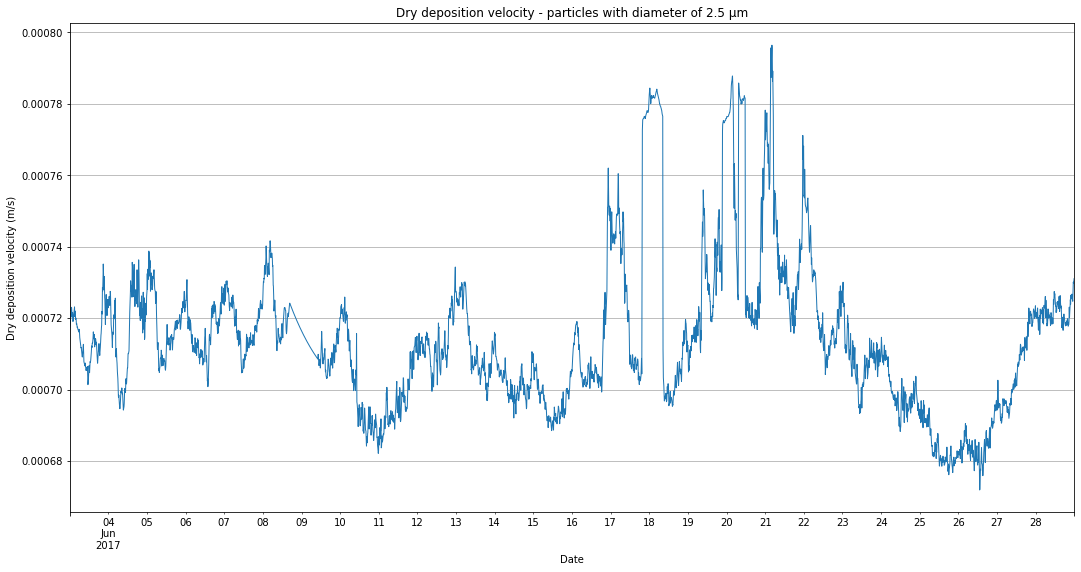

In [42]:
# Plot of the time series of Dry deposition velocity of particles with 2.5 micrometer diameter:

fig2 = data3['vd_2550'].plot(linewidth=1,title ='Dry deposition velocity - particles with diameter of 2.5 μm');
fig2.set_xlabel('Date')
fig2.set_ylabel('Dry deposition velocity (m/s)')
fig2.grid(True)
fig2.tick_params(axis='x', labelsize=16)


# To save the figure
plt.savefig('Fig2 - Dry deposition velocity of Particles diameter of 255 micrometers @ '+ name)

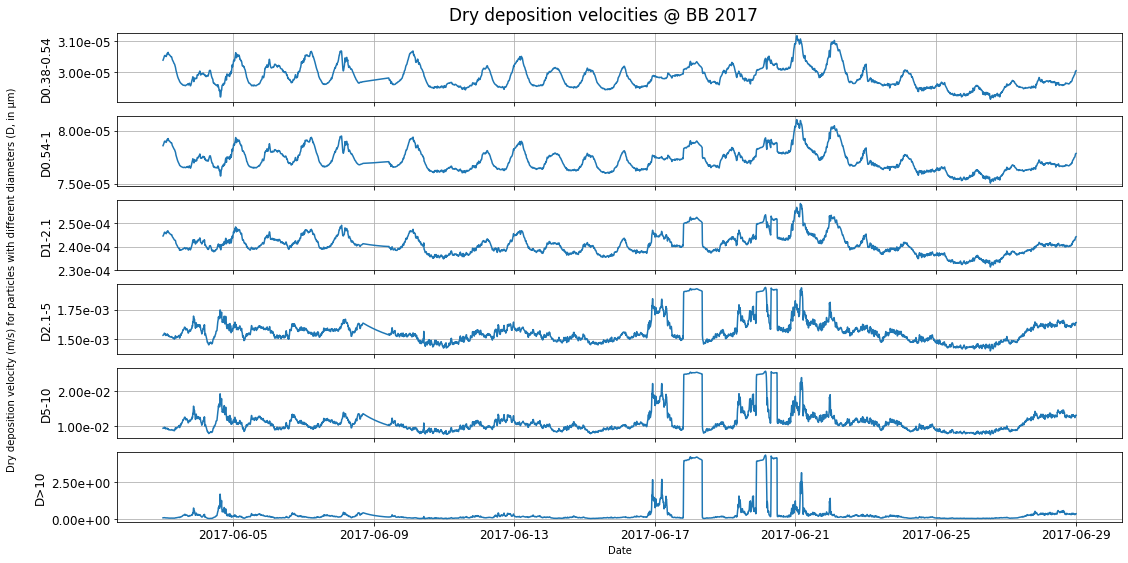

In [43]:
fig3, (ax6, ax7, ax8, ax9, ax10, ax11) = plt.subplots(6, sharex=True)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]


fig3.text(0.04, 0.5, 'Dry deposition velocity (m/s) for particles with different diameters (D, in μm)', va='center', rotation='vertical')

fig3.suptitle('Dry deposition velocities @ ' + name, y=0.92,fontsize=17)

import matplotlib.ticker as mtick

ax6.plot(data3['vd_0.38-0.54'])
ax6.set_ylabel('D0.38-0.54', fontsize=12)
ax6.tick_params(axis='x', labelsize=12 )
ax6.tick_params(axis='y', labelsize=12 )
ax6.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax6.grid(True)

ax7.plot(data3['vd_0.54-1'])
ax7.set_ylabel('D0.54-1', fontsize=12)
ax7.tick_params(axis='x', labelsize=12 )
ax7.tick_params(axis='y', labelsize=12 )
ax7.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax7.grid(True)

ax8.plot(data3['vd_1-2.1'])
ax8.set_ylabel('D1-2.1', fontsize=12)
ax8.tick_params(axis='x', labelsize=12 )
ax8.tick_params(axis='y', labelsize=12 )
ax8.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax8.grid(True)

ax9.plot(data3['vd_2.1-5'])
ax9.set_ylabel('D2.1-5', fontsize=12)
ax9.tick_params(axis='x', labelsize=12 )
ax9.tick_params(axis='y', labelsize=12 )
ax9.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax9.grid(True)

ax10.plot(data3['vd_5-10'])
ax10.set_ylabel('D5-10', fontsize=12)
ax10.tick_params(axis='x', labelsize=12 )
ax10.tick_params(axis='y', labelsize=12 )
ax10.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax10.grid(True)

ax11.plot(data3['vd_>10'])
ax11.set_ylabel('D>10', fontsize=12)
ax11.tick_params(axis='x', labelsize=12 )
ax11.tick_params(axis='y', labelsize=12 )
ax11.set_xlabel('Date')
ax11.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))
ax11.grid(True)

# To save the figure
plt.savefig('Fig3 - Dry deposition velocities @ ' + name)

In [44]:
# Check the descriptive statistics and save a table in Excel

descr = data3.describe()

descr.to_csv('Descriptive_Statistics_in_Python.csv', index=True)

descr

,T,RH,WD,WS,ustar,viscair,X_parameter,vg_460,vg_660,vg_890,...,vd_11000,vd_13000,vd_15000,vd_16500,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
count,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000,3.743100e+04,37431.000000,3.743100e+04,3.743100e+04,37431.000000,...,37431.000000,37431.000000,37431.000000,37431.000000,3.743100e+04,37431.000000,37431.000000,37431.000000,37431.000000,37431.000000
mean,0.012328,76.719808,143.452917,4.721129,0.147472,1.326154e-05,0.058989,2.976157e-05,5.626564e-05,0.000097,...,0.048261,0.126215,0.380246,0.989110,2.984974e-05,0.000077,0.000241,0.001569,0.011411,0.385958
std,2.058918,5.909200,39.841878,1.879599,0.044132,1.782256e-07,0.017653,3.434361e-07,6.771416e-07,0.000001,...,0.031748,0.137189,0.650133,2.262395,3.508601e-07,0.000001,0.000004,0.000100,0.003470,0.769367
min,-7.450000,60.720000,4.500000,0.000000,0.062000,1.261987e-05,0.024800,2.905472e-05,5.487239e-05,0.000094,...,0.021952,0.038820,0.068063,0.103890,2.913227e-05,0.000075,0.000231,0.001404,0.007592,0.058181
25%,-1.370000,72.340000,129.700000,3.537071,0.115783,1.314136e-05,0.046313,2.950739e-05,5.576449e-05,0.000096,...,0.031704,0.064152,0.131664,0.229587,2.959196e-05,0.000076,0.000238,0.001507,0.009367,0.114270
50%,0.562000,75.924000,140.220000,4.710000,0.141905,1.330879e-05,0.056762,2.966739e-05,5.607988e-05,0.000097,...,0.039881,0.088375,0.201500,0.384293,2.976559e-05,0.000077,0.000240,0.001553,0.010606,0.178501
75%,1.540000,80.675000,152.004571,6.011000,0.175707,1.339385e-05,0.070283,2.998813e-05,5.671225e-05,0.000098,...,0.051229,0.125519,0.322227,0.678126,3.008397e-05,0.000078,0.000243,0.001603,0.012143,0.294246
max,4.360000,92.240000,353.000000,9.210000,0.280415,1.364030e-05,0.112166,3.103982e-05,5.878673e-05,0.000101,...,0.190059,0.777118,3.622683,12.618995,3.117048e-05,0.000081,0.000258,0.001938,0.025696,4.302214


In [45]:
# Writing and saving file with all data

# This final csv file will have all the data produced:

selection = data3

output_selection = 'DDV Calculation_final.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)

In [46]:
DDV = data3[["T","RH","WS","WD", "vd_0.38-0.54","vd_0.54-1","vd_1-2.1","vd_2.1-5","vd_5-10","vd_>10"]]
DDV

,T,RH,WS,WD,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
Date,,,,,,,,,,
2017-06-03 00:01:00,-3.330,74.710,6.320,139.90,0.00003,0.000079,0.000245,0.001535,0.009444,0.111724
2017-06-03 00:02:00,-3.341,74.704,6.321,140.35,0.00003,0.000079,0.000245,0.001536,0.009445,0.111716
2017-06-03 00:03:00,-3.352,74.698,6.322,140.80,0.00003,0.000079,0.000245,0.001536,0.009445,0.111707
2017-06-03 00:04:00,-3.363,74.692,6.323,141.25,0.00003,0.000079,0.000245,0.001536,0.009445,0.111699
2017-06-03 00:05:00,-3.374,74.686,6.324,141.70,0.00003,0.000079,0.000245,0.001536,0.009445,0.111691
...,...,...,...,...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,3.118,129.12,0.00003,0.000078,0.000244,0.001642,0.013129,0.381669
2017-06-28 23:48:00,-1.042,86.306,3.116,129.44,0.00003,0.000078,0.000244,0.001642,0.013134,0.382156
2017-06-28 23:49:00,-1.048,86.314,3.114,129.76,0.00003,0.000078,0.000244,0.001642,0.013139,0.382644


In [47]:
# This final DDV csv file will have only DDV values for integrated bins:

selection2 = DDV

output_selection = 'DDV_final.csv'

# Save dataframe to csv
selection2.to_csv(output_selection, sep=',', index = True)

In [48]:
# OPC data analysis procedure

# This section of the script aims to calculate the particle's concentration from their number concentration. Original file is a database with particle counts (obtained from an optical particle count - OPC, namely, N2 from Alphasense - in the Black & Bloom campaign), with 16 different bins of particle's sizes.

# Input file:
# - "OPC raw data.csv"

# The output of script provides:
# - Plot of particle number concentrations in different bins
# - Plot of particle number concentrations considering 6 integrated bins
# - Plot of particle mass concentrations considering 6 integrated bins
# - Plot of particle mass concentration for particles with diameter equal to 2.55 micrometers (as an example)
# - database with all the data for number and mass concentrations - csv file
# - database with hourly data for the 6 integrated bins

# Remarks:
# - This script focus on the data treatment of OPC data (B&B).
# - The input file is called "OPC raw data.csv" (it is possible to download as an example)
# - The script manually specify the target bin sizes.
# - Zeros values of the database are considered as values
# - Analysis is done regarding each individual value
# -

In [49]:
data = pd.read_csv("OPC raw data.csv", delimiter=";", na_values=[' '])

# No values (0) were replaced by NaN in order to not interfere with the analysis

data

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,5.75,7.25,9,11,13,15,16.5
0,10/06/2017 18:45,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,5.0,1.0,0.0,3.0,0.0,0.0,0.0
1,10/06/2017 18:46,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,10/06/2017 18:47,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0
3,10/06/2017 18:48,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,2.0,1.0,0.0,0.0,0.0,0.0,0.0
4,10/06/2017 18:49,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,3.0,1.0,2.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26160,28/06/2017 22:45,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
26161,28/06/2017 22:46,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
26162,28/06/2017 22:47,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
26163,28/06/2017 22:48,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,0.0,3.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [50]:
# TASK: create columns with "year", "month", "day" and "minute"

data['Timestamp'] = pd.to_datetime(data.Timestamp, format='%d/%m/%Y %H:%M')

data1=data

# Create collumns with year, month, day, hour and minute:
data1['YEAR']=data['Timestamp'].dt.year
data1['MONTH']=data['Timestamp'].dt.month
data1['DAY']=data['Timestamp'].dt.day
data1['HOUR']=data['Timestamp'].dt.hour
data1['MINUTE']=data['Timestamp'].dt.minute
data1

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,...,9,11,13,15,16.5,YEAR,MONTH,DAY,HOUR,MINUTE
0,2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,...,0.0,3.0,0.0,0.0,0.0,2017,6,10,18,45
1,2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,...,1.0,0.0,0.0,0.0,0.0,2017,6,10,18,46
2,2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,47
3,2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,48
4,2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26160,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,45
26161,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,46
26162,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,47
26163,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,0.0,3.0,...,1.0,0.0,0.0,0.0,0.0,2017,6,28,22,48


In [51]:
# Set the timestamp as index:
data1 = data1.set_index('Timestamp')
data1

,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,9,11,13,15,16.5,YEAR,MONTH,DAY,HOUR,MINUTE
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,...,0.0,3.0,0.0,0.0,0.0,2017,6,10,18,45
2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,...,1.0,0.0,0.0,0.0,0.0,2017,6,10,18,46
2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,47
2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,48
2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,3.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,10,18,49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,45
2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,46
2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2017,6,28,22,47


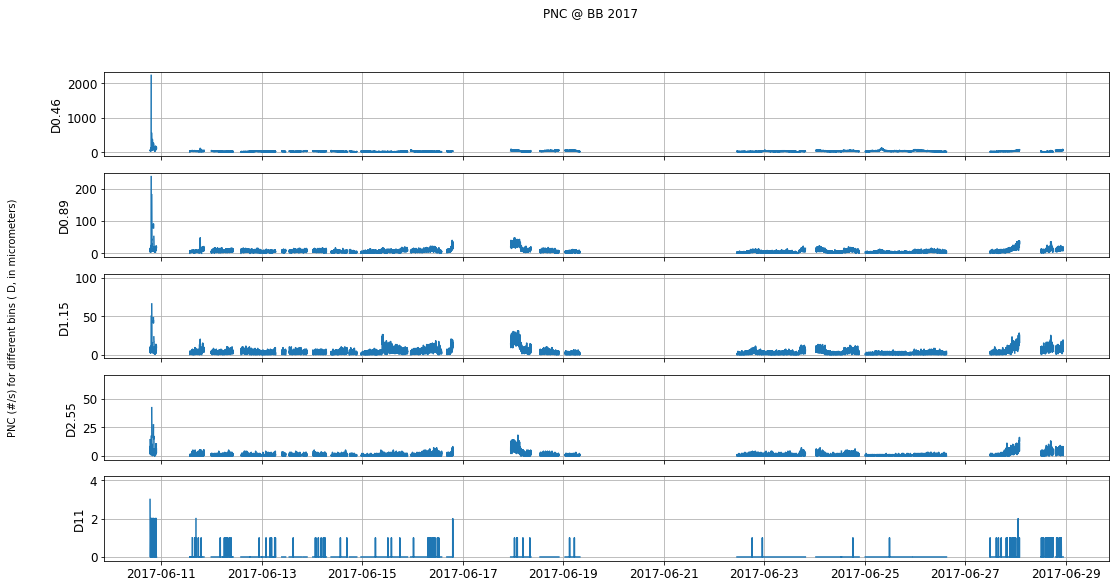

In [52]:
fig4, (ax1, ax2, ax3, ax4, ax5) = plt.subplots(5, sharex=True)

# Bigger figure
plt.rcParams['figure.figsize'] = [18, 9]

fig4.text(0.05, 0.5,'PNC (#/s) for different bins ( D, in micrometers)', va='center', rotation='vertical')

fig4.suptitle('PNC @ ' + name)

import matplotlib.ticker as mtick

ax1.plot(data1['0.46'])
ax1.set_ylabel('D0.46', fontsize=12)
ax1.tick_params(axis='x', labelsize=12)
ax1.tick_params(axis='y', labelsize=12)
ax1.grid(True)

ax2.plot(data1['0.89'])
ax2.set_ylabel('D0.89', fontsize=12)
ax2.tick_params(axis='x', labelsize=12 )
ax2.tick_params(axis='y', labelsize=12 )
ax2.grid(True)

ax3.plot(data1['1.15'])
ax3.set_ylabel('D1.15', fontsize=12)
ax3.tick_params(axis='x', labelsize=12 )
ax3.tick_params(axis='y', labelsize=12 )
ax3.grid(True)

ax4.plot(data1['2.55'])
ax4.set_ylabel('D2.55', fontsize=12)
ax4.tick_params(axis='x', labelsize=12 )
ax4.tick_params(axis='y', labelsize=12 )
ax4.grid(True)

ax5.plot(data1['11'])
ax5.set_ylabel('D11', fontsize=12)
ax5.tick_params(axis='x', labelsize=12 )
ax5.tick_params(axis='y', labelsize=12 )
ax5.grid(True)

# To save the figure
plt.savefig('Fig4 - Particle number concentrations in different bins @ ' + name)

In [53]:
# To create the working database "minute":
data3=data1

data3 = data3.drop('YEAR', 1)
data3 = data3.drop('MONTH', 1)
data3 = data3.drop('DAY', 1)
data3 = data3.drop('HOUR', 1)
data3 = data3.drop('MINUTE', 1)
minute=data3

# This will only give the sum of counts per bin
minute['0.38-0.54 μm']=minute['0.46']
minute['0.54-1 μm']=minute['0.66']+minute['0.89']
minute['1-2.1 μm']=minute['1.15']+minute['1.45']+minute['1.85']
minute['2.1-5 μm']=minute['2.55']+minute['3.5']+minute['4.5']
minute['5-10 μm']=minute['5.75']+minute['7.25']+minute['9']
minute['10-17 μm']=minute['11']+minute['13']+minute['15']+minute['16.5']
minute

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\1356752382.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data3 = data3.drop('YEAR', 1)
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\1356752382.py:5: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data3 = data3.drop('MONTH', 1)
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\1356752382.py:6: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data3 = data3.drop('DAY', 1)
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\1356752382.py:7: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data3 = data3.drop('HOUR', 1)
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\135675

,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,11,13,15,16.5,0.38-0.54 μm,0.54-1 μm,1-2.1 μm,2.1-5 μm,5-10 μm,10-17 μm
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,...,3.0,0.0,0.0,0.0,53.0,18.0,17.0,21.0,6.0,3.0
2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,...,0.0,0.0,0.0,0.0,57.0,26.0,23.0,19.0,1.0,0.0
2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,...,0.0,0.0,0.0,0.0,59.0,24.0,16.0,15.0,3.0,0.0
2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,...,0.0,0.0,0.0,0.0,64.0,14.0,15.0,23.0,3.0,0.0
2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,3.0,...,0.0,0.0,0.0,0.0,62.0,22.0,26.0,14.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,0.0,...,0.0,0.0,0.0,0.0,68.0,28.0,15.0,5.0,1.0,0.0
2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,0.0,...,0.0,0.0,0.0,0.0,72.0,34.0,16.0,10.0,1.0,0.0
2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,0.0,...,0.0,0.0,0.0,0.0,61.0,25.0,30.0,7.0,2.0,0.0


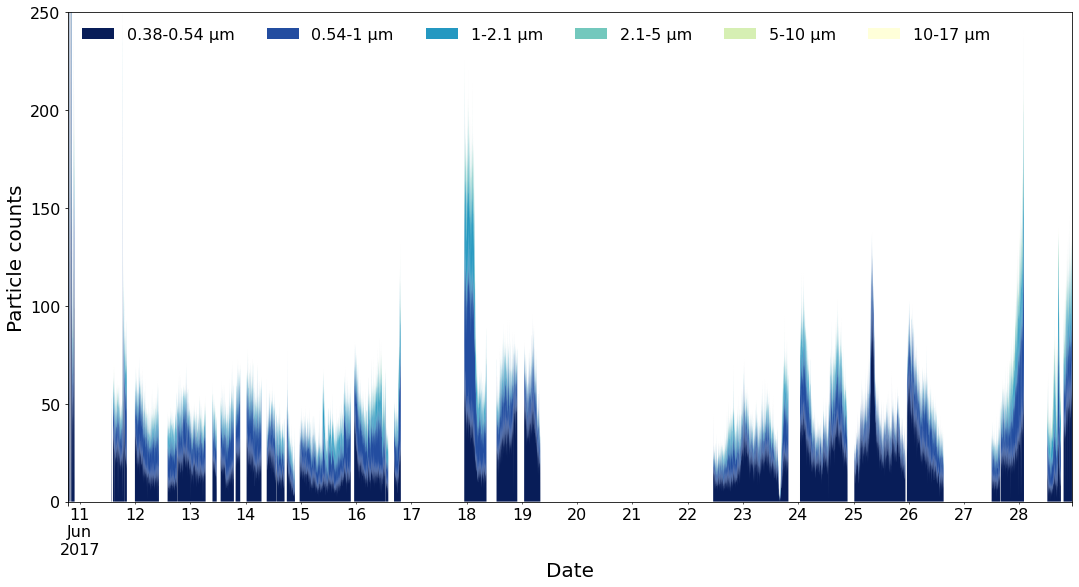

In [54]:
# Stacked collumn graph of the Particle counts for the different bin sizes

plt.rcParams['figure.figsize'] = [18, 9]

fig5 = minute[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']].plot.area(linewidth=0, colormap='YlGnBu_r',fontsize=16)
fig5.set_xlabel('Date',fontsize=20)
fig5.set_ylabel('Particle counts', fontsize=20)
fig5.grid(False)
fig5.legend(title='Particle size')
fig5.tick_params(axis='x', labelsize=16 )
fig5.tick_params(axis='y', labelsize=16 )
fig5.set_ylim(0,250)
fig5.legend(frameon=False, ncol=6,prop={'size': 16})

# To save the figure
plt.savefig('Fig 5 - Particle number concentrations during monitoring period @ ' + name)

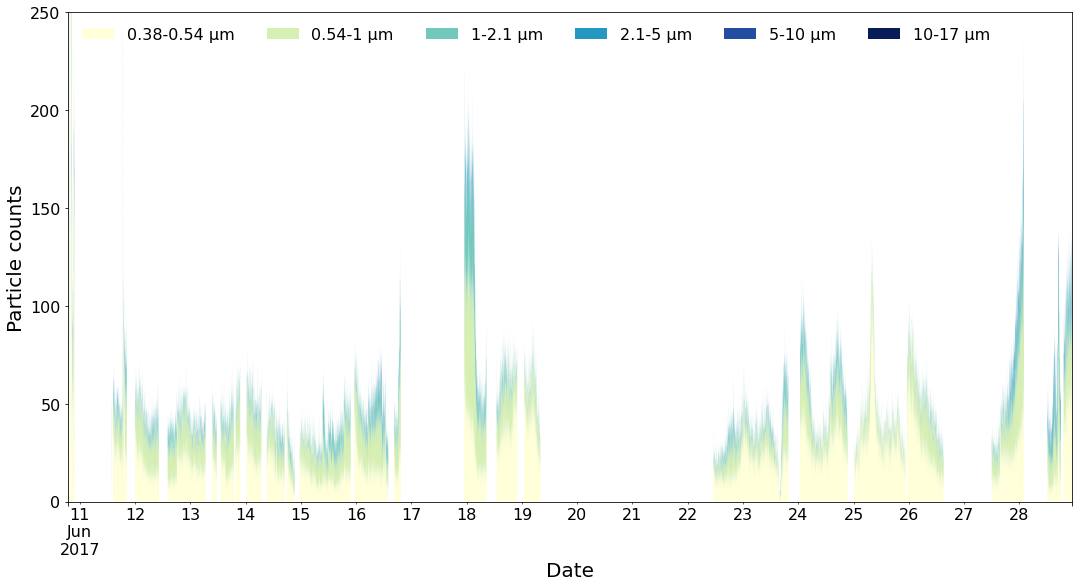

In [55]:
# Inverted Color scheme for Figure 5

plt.rcParams['figure.figsize'] = [18, 9]

fig5b = minute[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']].plot.area(linewidth=0, colormap='YlGnBu',fontsize=16)
fig5b.set_xlabel('Date',fontsize=20)
fig5b.set_ylabel('Particle counts', fontsize=20)
fig5b.grid(False)
fig5b.legend(title='Particle size')
fig5b.tick_params(axis='x', labelsize=16 )
fig5b.tick_params(axis='y', labelsize=16 )
fig5b.set_ylim(0,250)
fig5b.legend(frameon=False, ncol=6,prop={'size': 16})
    
plt.savefig('Fig 5b - Particle number concentrations during monitoring period - inverted color scheme @ ' + name)

In [56]:
# Calculation of concentration of particles (microg/m3)

# Assumed density of dust particles:

# dens = 2.5 g/cm3 (value below is introduced as microg/m3)

dens = 2.5*10**12 # the units are converted to microg/m3

flow = 0.00022 # in m3/min (sampling flow rate of the OPC monitoring device) 

import math as math # This will import Math constants, such as pi value

In [57]:
# Calculation of particle's volume considering a perfect sphere

def vol(D):
    """
    Function to calculate the volume of a particle considering it as a sphere (in m3)
    Parameters
    -------
    : int | float
        Input diameter in micrometers (should be a number)
    Returns
    -------
    volume (in m3) (float)
    """
    
    # Calculation of volume in m3 and return it
    volume_result = math.pi*(4/3)*(((D/2)*10**-6)**3)
    return volume_result

In [58]:
# Calculation of concentration of particles

# Concentration = (counts * volume * density) / flow

In [59]:
# Calculation of concentrations:

minute['C0.46']=(minute['0.46']*vol(0.46)*dens)/flow
minute['C0.66']=(minute['0.66']*vol(0.66)*dens)/flow
minute['C0.89']=(minute['0.89']*vol(0.89)*dens)/flow
minute['C1.15']=(minute['1.15']*vol(1.15)*dens)/flow
minute['C1.45']=(minute['1.45']*vol(1.45)*dens)/flow
minute['C1.85']=(minute['1.85']*vol(1.85)*dens)/flow
minute['C2.55']=(minute['2.55']*vol(2.55)*dens)/flow
minute['C3.5']=(minute['3.5']*vol(3.5)*dens)/flow
minute['C4.5']=(minute['4.5']*vol(4.5)*dens)/flow
minute['C5.75']=(minute['5.75']*vol(5.75)*dens)/flow
minute['C7.25']=(minute['7.25']*vol(7.25)*dens)/flow
minute['C9']=(minute['9']*vol(9)*dens)/flow
minute['C11']=(minute['11']*vol(11)*dens)/flow
minute['C13']=(minute['13']*vol(13)*dens)/flow
minute['C15']=(minute['15']*vol(15)*dens)/flow
minute['C16.5']=(minute['16.5']*vol(16.5)*dens)/flow



minute

,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
Timestamp,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,...,1.381225,1.530634,0.542192,5.655741,2.267410,0.00000,23.758294,0.0,0.0,0.0
2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,...,0.789272,2.295951,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0
2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,...,0.789272,1.275528,1.084385,3.393444,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,...,1.282566,2.040845,1.084385,2.262296,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,3.0,...,0.690613,1.020423,1.626577,1.131148,4.534819,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,0.0,...,0.394636,0.255106,0.000000,0.000000,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,0.0,...,0.789272,0.510211,0.000000,1.131148,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,0.0,...,0.493295,0.510211,0.000000,1.131148,2.267410,0.00000,0.000000,0.0,0.0,0.0


In [60]:
# Calculation of particles concentration considering intervals of diameter

minute['0.38-0.54 μm']=minute['C0.46']
minute['0.54-1 μm']=minute['C0.66']+minute['C0.89']
minute['1-2.1 μm']=minute['C1.15']+minute['C1.45']+minute['C1.85']
minute['2.1-5 μm']=minute['C2.55']+minute['C3.5']+minute['C4.5']
minute['5-10 μm']=minute['C5.75']+minute['C7.25']+minute['C9']
minute['10-17 μm']=minute['C11']+minute['C13']+minute['C15']+minute['C16.5']

Minute_Conc = minute[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']]
Minute_Conc


,0.38-0.54 μm,0.54-1 μm,1-2.1 μm,2.1-5 μm,5-10 μm,10-17 μm
Timestamp,,,,,,
2017-06-10 18:45:00,0.030695,0.050662,0.408744,3.454052,7.923150,23.758294
2017-06-10 18:46:00,0.033011,0.071799,0.539821,4.169607,4.337540,0.000000
2017-06-10 18:47:00,0.034170,0.070862,0.381515,3.149185,3.393444,0.000000
2017-06-10 18:48:00,0.037065,0.041336,0.200722,4.407797,4.529706,0.000000
2017-06-10 18:49:00,0.035907,0.062473,0.603329,3.337613,5.665967,0.000000
...,...,...,...,...,...,...
2017-06-28 22:45:00,0.039382,0.077704,0.267060,0.649741,2.267410,0.000000
2017-06-28 22:46:00,0.041699,0.095420,0.333357,1.299483,1.131148,0.000000
2017-06-28 22:47:00,0.035328,0.065121,0.566805,1.003506,3.398558,0.000000


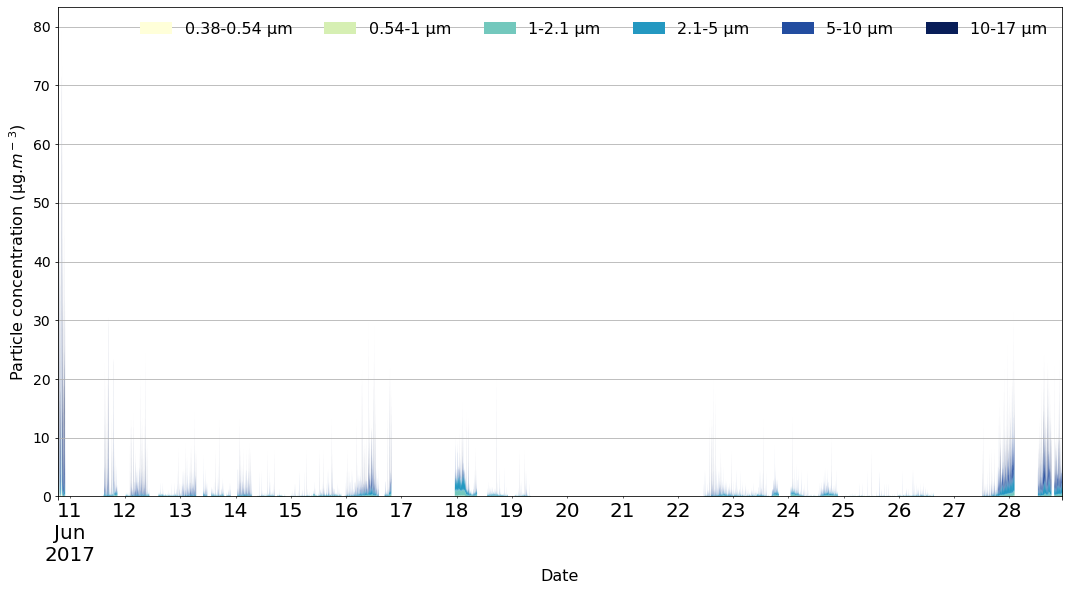

In [61]:
# Stacked collumn graph of the Particle concentrations for the different bin sizes (inverted color scheme)

fig6 = Minute_Conc[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']].plot.area(linewidth=0, colormap='YlGnBu',fontsize=20)
fig6.set_xlabel('Date',fontsize=16)
fig6.set_ylabel('Particle concentration (μg.$m^-$$^3$)', fontsize=16)
fig6.grid(True)
fig6.legend(title='Particle size')
fig6.tick_params(axis='x', labelsize=14 )
fig6.tick_params(axis='y', labelsize=14 )
fig6.legend(frameon=False, ncol=6,prop={'size': 16})


plt.savefig('Fig6 - Particle concentrations during monitoring period @ ' + name)

In [62]:
Minute_Conc

,0.38-0.54 μm,0.54-1 μm,1-2.1 μm,2.1-5 μm,5-10 μm,10-17 μm
Timestamp,,,,,,
2017-06-10 18:45:00,0.030695,0.050662,0.408744,3.454052,7.923150,23.758294
2017-06-10 18:46:00,0.033011,0.071799,0.539821,4.169607,4.337540,0.000000
2017-06-10 18:47:00,0.034170,0.070862,0.381515,3.149185,3.393444,0.000000
2017-06-10 18:48:00,0.037065,0.041336,0.200722,4.407797,4.529706,0.000000
2017-06-10 18:49:00,0.035907,0.062473,0.603329,3.337613,5.665967,0.000000
...,...,...,...,...,...,...
2017-06-28 22:45:00,0.039382,0.077704,0.267060,0.649741,2.267410,0.000000
2017-06-28 22:46:00,0.041699,0.095420,0.333357,1.299483,1.131148,0.000000
2017-06-28 22:47:00,0.035328,0.065121,0.566805,1.003506,3.398558,0.000000


In [63]:
# Writing and saving file with all data

# This final csv file will have all the data produced:

selection = minute

output_selection = 'Minute concentration particles OPC_all data.csv'

# Save dataframe to csv
selection.to_csv(output_selection, sep=',', index = True)


# This csv file will have the concentration of particles considering integrated bins:

selection2 = Minute_Conc

output_selection2 = 'Minute Conc particles_selected bins.csv'

# Save dataframe to csv
selection2.to_csv(output_selection2, sep=',', index = True)

In [64]:
# Calculation of Flux deposition of particles based on the particles deposition velocity and their concentration (OPC data)
# For this calculation two previously obtained datasets are needed: dry deposition database ("DDV_final.csv")
# and concentration database obtained from OPC data ("Minute concentration particles OPC_all data.csv")

In [65]:
# Upload the dry deposition calculations obtained from the weather data

DDV = pd.read_csv("DDV Calculation_final.csv", delimiter=",", na_values=['0'])

# No values (0) were replaced by NaN in order to not interfere with the analysis

# Add columns with year, month, and weekday name

DDV['Date'] = DDV['Date'].astype('datetime64')
DDV

,Date,T,RH,WD,WS,ustar,viscair,X_parameter,vg_460,vg_660,...,vd_11000,vd_13000,vd_15000,vd_16500,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10
0,2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013,0.073793,0.00003,0.000057,...,0.031651,0.063489,0.128944,0.222811,0.00003,0.000079,0.000245,0.001535,0.009444,0.111724
1,2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013,0.073804,0.00003,0.000057,...,0.031651,0.063487,0.128935,0.222789,0.00003,0.000079,0.000245,0.001536,0.009445,0.111716
2,2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013,0.073816,0.00003,0.000057,...,0.031651,0.063485,0.128926,0.222767,0.00003,0.000079,0.000245,0.001536,0.009445,0.111707
3,2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013,0.073827,0.00003,0.000057,...,0.031651,0.063483,0.128918,0.222745,0.00003,0.000079,0.000245,0.001536,0.009445,0.111699
4,2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013,0.073839,0.00003,0.000057,...,0.031651,0.063481,0.128909,0.222723,0.00003,0.000079,0.000245,0.001536,0.009445,0.111691
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37426,2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013,0.042980,0.00003,0.000057,...,0.058572,0.150883,0.410292,0.906930,0.00003,0.000078,0.000244,0.001642,0.013129,0.381669
37427,2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013,0.042965,0.00003,0.000057,...,0.058610,0.151018,0.410777,0.908219,0.00003,0.000078,0.000244,0.001642,0.013134,0.382156
37428,2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013,0.042950,0.00003,0.000057,...,0.058649,0.151154,0.411262,0.909511,0.00003,0.000078,0.000244,0.001642,0.013139,0.382644
37429,2017-06-28 23:50:00,-1.054,86.322,130.08,3.112,0.107336,0.000013,0.042934,0.00003,0.000057,...,0.058687,0.151290,0.411749,0.910805,0.00003,0.000078,0.000244,0.001642,0.013144,0.383133


In [66]:
# Set the timestamp as index:

DDV = DDV.set_index('Date')

DDV['Year'] = DDV.index.year
DDV['Month'] = DDV.index.month
DDV['Day'] = DDV.index.day
DDV['Hour'] = DDV.index.hour



DDV

,T,RH,WD,WS,ustar,viscair,X_parameter,vg_460,vg_660,vg_890,...,vd_0.38-0.54,vd_0.54-1,vd_1-2.1,vd_2.1-5,vd_5-10,vd_>10,Year,Month,Day,Hour
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-03 00:01:00,-3.330,74.710,139.90,6.320,0.184482,0.000013,0.073793,0.00003,0.000057,0.000099,...,0.00003,0.000079,0.000245,0.001535,0.009444,0.111724,2017,6,3,0
2017-06-03 00:02:00,-3.341,74.704,140.35,6.321,0.184510,0.000013,0.073804,0.00003,0.000057,0.000099,...,0.00003,0.000079,0.000245,0.001536,0.009445,0.111716,2017,6,3,0
2017-06-03 00:03:00,-3.352,74.698,140.80,6.322,0.184539,0.000013,0.073816,0.00003,0.000057,0.000099,...,0.00003,0.000079,0.000245,0.001536,0.009445,0.111707,2017,6,3,0
2017-06-03 00:04:00,-3.363,74.692,141.25,6.323,0.184568,0.000013,0.073827,0.00003,0.000057,0.000099,...,0.00003,0.000079,0.000245,0.001536,0.009445,0.111699,2017,6,3,0
2017-06-03 00:05:00,-3.374,74.686,141.70,6.324,0.184597,0.000013,0.073839,0.00003,0.000057,0.000099,...,0.00003,0.000079,0.000245,0.001536,0.009445,0.111691,2017,6,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 23:47:00,-1.036,86.298,129.12,3.118,0.107451,0.000013,0.042980,0.00003,0.000057,0.000098,...,0.00003,0.000078,0.000244,0.001642,0.013129,0.381669,2017,6,28,23
2017-06-28 23:48:00,-1.042,86.306,129.44,3.116,0.107413,0.000013,0.042965,0.00003,0.000057,0.000098,...,0.00003,0.000078,0.000244,0.001642,0.013134,0.382156,2017,6,28,23
2017-06-28 23:49:00,-1.048,86.314,129.76,3.114,0.107374,0.000013,0.042950,0.00003,0.000057,0.000098,...,0.00003,0.000078,0.000244,0.001642,0.013139,0.382644,2017,6,28,23


In [67]:
# Upload the concentration values of particles obtained from the OPC data

Conc = pd.read_csv("Minute concentration particles OPC_all data.csv", delimiter=",", na_values=[' '])

# No values (0) were replaced by NaN in order to not interfere with the analysis

Conc

,Timestamp,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
0,2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,...,1.381225,1.530634,0.542192,5.655741,2.267410,0.00000,23.758294,0.0,0.0,0.0
1,2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,...,0.789272,2.295951,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0
2,2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,...,0.789272,1.275528,1.084385,3.393444,0.000000,0.00000,0.000000,0.0,0.0,0.0
3,2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,...,1.282566,2.040845,1.084385,2.262296,2.267410,0.00000,0.000000,0.0,0.0,0.0
4,2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,...,0.690613,1.020423,1.626577,1.131148,4.534819,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26160,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,...,0.394636,0.255106,0.000000,0.000000,2.267410,0.00000,0.000000,0.0,0.0,0.0
26161,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,...,0.789272,0.510211,0.000000,1.131148,0.000000,0.00000,0.000000,0.0,0.0,0.0
26162,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,...,0.493295,0.510211,0.000000,1.131148,2.267410,0.00000,0.000000,0.0,0.0,0.0
26163,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,0.0,3.0,...,0.000000,0.765317,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0


In [68]:
Conc.rename(columns={'Timestamp':'Date'},inplace=True)
Conc['Date'] = Conc['Date'].astype('datetime64')
Conc

,Date,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
0,2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,...,1.381225,1.530634,0.542192,5.655741,2.267410,0.00000,23.758294,0.0,0.0,0.0
1,2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,...,0.789272,2.295951,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0
2,2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,...,0.789272,1.275528,1.084385,3.393444,0.000000,0.00000,0.000000,0.0,0.0,0.0
3,2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,...,1.282566,2.040845,1.084385,2.262296,2.267410,0.00000,0.000000,0.0,0.0,0.0
4,2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,...,0.690613,1.020423,1.626577,1.131148,4.534819,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26160,2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,...,0.394636,0.255106,0.000000,0.000000,2.267410,0.00000,0.000000,0.0,0.0,0.0
26161,2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,...,0.789272,0.510211,0.000000,1.131148,0.000000,0.00000,0.000000,0.0,0.0,0.0
26162,2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,...,0.493295,0.510211,0.000000,1.131148,2.267410,0.00000,0.000000,0.0,0.0,0.0
26163,2017-06-28 22:48:00,Filter4,54.0,15.0,19.0,5.0,2.0,3.0,0.0,3.0,...,0.000000,0.765317,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0


In [69]:
# Set the timestamp as index:
Conc2=Conc

Conc2 = Conc2.set_index('Date')
Conc2

,Diameter,0.46,0.66,0.89,1.15,1.45,1.85,2.55,3.5,4.5,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,Filter1,53.0,10.0,8.0,4.0,6.0,7.0,14.0,6.0,1.0,...,1.381225,1.530634,0.542192,5.655741,2.267410,0.00000,23.758294,0.0,0.0,0.0
2017-06-10 18:46:00,Filter1,57.0,15.0,11.0,8.0,5.0,10.0,8.0,9.0,2.0,...,0.789272,2.295951,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0
2017-06-10 18:47:00,Filter1,59.0,12.0,12.0,5.0,4.0,7.0,8.0,5.0,2.0,...,0.789272,1.275528,1.084385,3.393444,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:48:00,Filter1,64.0,7.0,7.0,10.0,4.0,1.0,13.0,8.0,2.0,...,1.282566,2.040845,1.084385,2.262296,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:49:00,Filter1,62.0,12.0,10.0,7.0,9.0,10.0,7.0,4.0,3.0,...,0.690613,1.020423,1.626577,1.131148,4.534819,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,Filter4,68.0,16.0,12.0,7.0,5.0,3.0,4.0,1.0,0.0,...,0.394636,0.255106,0.000000,0.000000,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:46:00,Filter4,72.0,19.0,15.0,6.0,5.0,5.0,8.0,2.0,0.0,...,0.789272,0.510211,0.000000,1.131148,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:47:00,Filter4,61.0,16.0,9.0,19.0,1.0,10.0,5.0,2.0,0.0,...,0.493295,0.510211,0.000000,1.131148,2.267410,0.00000,0.000000,0.0,0.0,0.0


In [70]:
# To merde both datasets based on timestamp:
data = pd.merge(DDV, Conc2, on='Date')
data

,T,RH,WD,WS,ustar,viscair,X_parameter,vg_460,vg_660,vg_890,...,C2.55,C3.5,C4.5,C5.75,C7.25,C9,C11,C13,C15,C16.5
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,1.746,69.468,162.46,6.536,0.190785,0.000013,0.076314,0.000029,0.000056,0.000096,...,1.381225,1.530634,0.542192,5.655741,2.267410,0.00000,23.758294,0.0,0.0,0.0
2017-06-10 18:46:00,1.750,69.350,162.65,6.565,0.191642,0.000013,0.076657,0.000029,0.000056,0.000096,...,0.789272,2.295951,1.084385,0.000000,0.000000,4.33754,0.000000,0.0,0.0,0.0
2017-06-10 18:47:00,1.754,69.232,162.84,6.594,0.192502,0.000013,0.077001,0.000029,0.000056,0.000096,...,0.789272,1.275528,1.084385,3.393444,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:48:00,1.758,69.114,163.03,6.623,0.193364,0.000013,0.077346,0.000029,0.000056,0.000096,...,1.282566,2.040845,1.084385,2.262296,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-10 18:49:00,1.762,68.996,163.22,6.652,0.194228,0.000013,0.077691,0.000029,0.000056,0.000096,...,0.690613,1.020423,1.626577,1.131148,4.534819,0.00000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,-0.296,85.288,129.84,3.250,0.110019,0.000013,0.044007,0.000030,0.000056,0.000097,...,0.394636,0.255106,0.000000,0.000000,2.267410,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:46:00,-0.305,85.265,129.75,3.260,0.110215,0.000013,0.044086,0.000030,0.000056,0.000097,...,0.789272,0.510211,0.000000,1.131148,0.000000,0.00000,0.000000,0.0,0.0,0.0
2017-06-28 22:47:00,-0.314,85.242,129.66,3.270,0.110412,0.000013,0.044165,0.000030,0.000056,0.000097,...,0.493295,0.510211,0.000000,1.131148,2.267410,0.00000,0.000000,0.0,0.0,0.0


In [71]:
# Calculation of the flux of particles deposition using the equation by Jim et al. (1994), where the 
# Flux (microg.m2.s-1) is the dry deposition velocity at bin i (m.s-1) x Concentrations of particles at bin i (microg.m-3)

data['F0.46']=data['vd_460']*data['C0.46'] 
data['F0.66']=data['vd_660']*data['C0.66']
data['F0.89']=data['vd_890']*data['C0.89'] 
data['F1.15']=data['vd_1150']*data['C1.15'] 
data['F1.45']=data['vd_1450']*data['C1.45'] 
data['F1.85']=data['vd_1850']*data['C1.85'] 
data['F2.55']=data['vd_2550']*data['C2.55'] 
data['F3.5']=data['vd_3500']*data['C3.5'] 
data['F4.5']=data['vd_4500']*data['C4.5']
data['F5.75']=data['vd_5750']*data['C5.75']
data['F7.25']=data['vd_7250']*data['C7.25'] 
data['F9']=data['vd_9000']*data['C9']
data['F11']=data['vd_11000']*data['C11']
data['F13']=data['vd_13000']*data['C13']
data['F15']=data['vd_15000']*data['C15']
data['F16.5']=data['vd_16500']*data['C16.5']


Flux = data[['T','RH','WS','WD', 'Year', 'Month','Day', 'Hour','F0.46','F0.66','F0.89','F1.15', 'F1.45','F1.85','F2.55','F3.5','F4.5', 'F5.75','F7.25','F9','F11','F13','F15','F16.5']]
Flux

,T,RH,WS,WD,Year,Month,Day,Hour,F0.46,F0.66,...,F2.55,F3.5,F4.5,F5.75,F7.25,F9,F11,F13,F15,F16.5
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,1.746,69.468,6.536,162.46,2017,6,10,18,9.065493e-07,9.564678e-07,...,0.000955,0.002077,0.001287,0.023986,0.017541,0.000000,0.685631,0.0,0.0,0.0
2017-06-10 18:46:00,1.750,69.350,6.565,162.65,2017,6,10,18,9.749377e-07,1.434644e-06,...,0.000546,0.003114,0.002572,0.000000,0.000000,0.063033,0.000000,0.0,0.0,0.0
2017-06-10 18:47:00,1.754,69.232,6.594,162.84,2017,6,10,18,1.009115e-06,1.147669e-06,...,0.000546,0.001729,0.002570,0.014361,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-06-10 18:48:00,1.758,69.114,6.623,163.03,2017,6,10,18,1.094599e-06,6.694466e-07,...,0.000886,0.002766,0.002568,0.009564,0.017453,0.000000,0.000000,0.0,0.0,0.0
2017-06-10 18:49:00,1.762,68.996,6.652,163.22,2017,6,10,18,1.060359e-06,1.147577e-06,...,0.000477,0.001382,0.003850,0.004777,0.034848,0.000000,0.000000,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,-0.296,85.288,3.250,129.84,2017,6,28,22,1.178163e-06,1.553028e-06,...,0.000286,0.000374,0.000000,0.000000,0.023539,0.000000,0.000000,0.0,0.0,0.0
2017-06-28 22:46:00,-0.305,85.265,3.260,129.75,2017,6,28,22,1.247521e-06,1.844295e-06,...,0.000573,0.000749,0.000000,0.005797,0.000000,0.000000,0.000000,0.0,0.0,0.0
2017-06-28 22:47:00,-0.314,85.242,3.270,129.66,2017,6,28,22,1.056974e-06,1.553153e-06,...,0.000358,0.000749,0.000000,0.005793,0.023489,0.000000,0.000000,0.0,0.0,0.0


In [72]:
# To save the dataset with Flux calculations:

# Considering the integrated bins:

Flux2=Flux

Flux2['F0.38-0.54']=Flux['F0.46']
Flux2['F0.54-1']=Flux2['F0.66']+Flux2['F0.89']
Flux2['F1-2.1']=Flux2['F1.15']+Flux2['F1.45']+Flux2['F1.85']
Flux2['F2.1-5']=Flux2['F2.55']+Flux2['F3.5']+Flux2['F4.5'] 
Flux2['F5-10']=Flux2['F5.75']+Flux2['F7.25']+Flux2['F9']
Flux2['F>10']=Flux2['F11']+Flux2['F13']+Flux2['F15']+Flux2['F16.5']

selection2 = Flux2

output_selection2 = 'Flux values_all.csv'

# Save dataframe to csv
selection2.to_csv(output_selection2, sep=',', index = True)

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\2122046954.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flux2['F0.38-0.54']=Flux['F0.46']
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\2122046954.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flux2['F0.54-1']=Flux2['F0.66']+Flux2['F0.89']
C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\2122046954.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [73]:
Flux2

,T,RH,WS,WD,Year,Month,Day,Hour,F0.46,F0.66,...,F11,F13,F15,F16.5,F0.38-0.54,F0.54-1,F1-2.1,F2.1-5,F5-10,F>10
Date,,,,,,,,,,,,,,,,,,,,,
2017-06-10 18:45:00,1.746,69.468,6.536,162.46,2017,6,10,18,9.065493e-07,9.564678e-07,...,0.685631,0.0,0.0,0.0,9.065493e-07,0.000004,0.000122,0.004319,0.041527,0.685631
2017-06-10 18:46:00,1.750,69.350,6.565,162.65,2017,6,10,18,9.749377e-07,1.434644e-06,...,0.000000,0.0,0.0,0.0,9.749377e-07,0.000006,0.000164,0.006231,0.063033,0.000000
2017-06-10 18:47:00,1.754,69.232,6.594,162.84,2017,6,10,18,1.009115e-06,1.147669e-06,...,0.000000,0.0,0.0,0.0,1.009115e-06,0.000006,0.000116,0.004845,0.014361,0.000000
2017-06-10 18:48:00,1.758,69.114,6.623,163.03,2017,6,10,18,1.094599e-06,6.694466e-07,...,0.000000,0.0,0.0,0.0,1.094599e-06,0.000004,0.000041,0.006220,0.027016,0.000000
2017-06-10 18:49:00,1.762,68.996,6.652,163.22,2017,6,10,18,1.060359e-06,1.147577e-06,...,0.000000,0.0,0.0,0.0,1.060359e-06,0.000005,0.000178,0.005709,0.039625,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,-0.296,85.288,3.250,129.84,2017,6,28,22,1.178163e-06,1.553028e-06,...,0.000000,0.0,0.0,0.0,1.178163e-06,0.000006,0.000070,0.000661,0.023539,0.000000
2017-06-28 22:46:00,-0.305,85.265,3.260,129.75,2017,6,28,22,1.247521e-06,1.844295e-06,...,0.000000,0.0,0.0,0.0,1.247521e-06,0.000008,0.000097,0.001321,0.005797,0.000000
2017-06-28 22:47:00,-0.314,85.242,3.270,129.66,2017,6,28,22,1.056974e-06,1.553153e-06,...,0.000000,0.0,0.0,0.0,1.056974e-06,0.000005,0.000166,0.001107,0.029282,0.000000


In [74]:
# Transform the database in a proper design to plot the graphs:

Flux3=Flux2.rename(columns = {'F0.38-0.54':'0.38-0.54','F0.54-1':'0.54-1','F1-2.1':'1-2.1','F2.1-5':'2.1-5','F5-10':'5-10','F>10':'10-17','F0.46':'0.46','F0.66':'0.66','F0.89':'0.89','F1.15':'1.15','F1.45':'1.45','F1.85':'1.85','F2.55':'2.55','F3.5':'3.5','F4.5':'4.5','F5.75':'5.75','F7.25':'7.25','F9':'9','F11':'11','F13':'13','F15':'15', 'F16.5':'16.5'})
Tflux = Flux3.transpose()
Tflux['Index'] = Tflux.index
Tflux2 = Tflux.reset_index(drop=True)

# Remove specific rows by row number
# It will remove data regarding weather data and individual fluxes
Tflux3=Tflux2.drop([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23])
Tflux4 =  Tflux3.set_index('Index')
Flux4 = Tflux4.transpose()
Flux4

Index,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,10-17
Date,,,,,,
2017-06-10 18:45:00,9.065493e-07,0.000004,0.000122,0.004319,0.041527,0.685631
2017-06-10 18:46:00,9.749377e-07,0.000006,0.000164,0.006231,0.063033,0.000000
2017-06-10 18:47:00,1.009115e-06,0.000006,0.000116,0.004845,0.014361,0.000000
2017-06-10 18:48:00,1.094599e-06,0.000004,0.000041,0.006220,0.027016,0.000000
2017-06-10 18:49:00,1.060359e-06,0.000005,0.000178,0.005709,0.039625,0.000000
...,...,...,...,...,...,...
2017-06-28 22:45:00,1.178163e-06,0.000006,0.000070,0.000661,0.023539,0.000000
2017-06-28 22:46:00,1.247521e-06,0.000008,0.000097,0.001321,0.005797,0.000000
2017-06-28 22:47:00,1.056974e-06,0.000005,0.000166,0.001107,0.029282,0.000000


In [75]:
# Create a specific dataframe with the collums name (diameters) to be used as label (with extra blank collumns to optimize
# the visualisation of the x-axis in both edges):
Flux5 = Flux4
import numpy as np
# Add an extra collumn with NaN values (at the end of the database):
Flux5[' '] = np.nan
Flux5=Flux5.rename(columns = {' ':'  '})

# Create a database with the labels and change the last blank label to the beginning:
cols = list(Flux5.columns.values)

cols

# Redefine the order:
cols = ['  ','0.38-0.54', '0.54-1', '1-2.1', '2.1-5','5-10', '10-17']

# Update the collumns' order in the original database:
Flux6 = Flux5[cols]

# Create extra collumn with NaN values (at the end of the database):
Flux6[' '] =np.nan
Flux6

C:\Users\nunocanha\AppData\Local\Temp\ipykernel_17304\31901492.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Flux6[' '] =np.nan


Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,10-17,
Date,,,,,,,,
2017-06-10 18:45:00,NaN,9.065493e-07,0.000004,0.000122,0.004319,0.041527,0.685631,NaN
2017-06-10 18:46:00,NaN,9.749377e-07,0.000006,0.000164,0.006231,0.063033,0.000000,NaN
2017-06-10 18:47:00,NaN,1.009115e-06,0.000006,0.000116,0.004845,0.014361,0.000000,NaN
2017-06-10 18:48:00,NaN,1.094599e-06,0.000004,0.000041,0.006220,0.027016,0.000000,NaN
2017-06-10 18:49:00,NaN,1.060359e-06,0.000005,0.000178,0.005709,0.039625,0.000000,NaN
...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,NaN,1.178163e-06,0.000006,0.000070,0.000661,0.023539,0.000000,NaN
2017-06-28 22:46:00,NaN,1.247521e-06,0.000008,0.000097,0.001321,0.005797,0.000000,NaN
2017-06-28 22:47:00,NaN,1.056974e-06,0.000005,0.000166,0.001107,0.029282,0.000000,NaN


In [76]:
# To create a collumns plot with mean and standard deviations:

# Create the database for use with mean and sd values:
stats = Flux6.describe()
Tstats = stats.transpose()
Tstats1 = Tstats.reset_index()
Index = Tstats1['Index']
Mean = Tstats1['mean']
Std = Tstats1['std']

stats

Index,,0.38-0.54,0.54-1,1-2.1,2.1-5,5-10,10-17,
count,0.0,1.452400e+04,14524.000000,14524.000000,14524.000000,14524.000000,14520.000000,0.0
mean,NaN,4.249669e-07,0.000004,0.000035,0.000477,0.004323,0.023379,NaN
std,NaN,4.522110e-07,0.000003,0.000049,0.001115,0.019558,0.280855,NaN
min,NaN,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,NaN,2.450826e-07,0.000002,0.000008,0.000000,0.000000,0.000000,NaN
50%,NaN,3.658394e-07,0.000003,0.000021,0.000069,0.000000,0.000000,NaN
75%,NaN,5.204625e-07,0.000005,0.000042,0.000370,0.000000,0.000000,NaN
max,NaN,3.804181e-05,0.000136,0.000892,0.036977,0.321975,10.215608,NaN


C:\Users\nunocanha\Anaconda3\lib\site-packages\numpy\core\_methods.py:44: RuntimeWarning: invalid value encountered in reduce
  return umr_minimum(a, axis, None, out, keepdims, initial, where)
C:\Users\nunocanha\Anaconda3\lib\site-packages\numpy\core\_methods.py:40: RuntimeWarning: invalid value encountered in reduce
  return umr_maximum(a, axis, None, out, keepdims, initial, where)


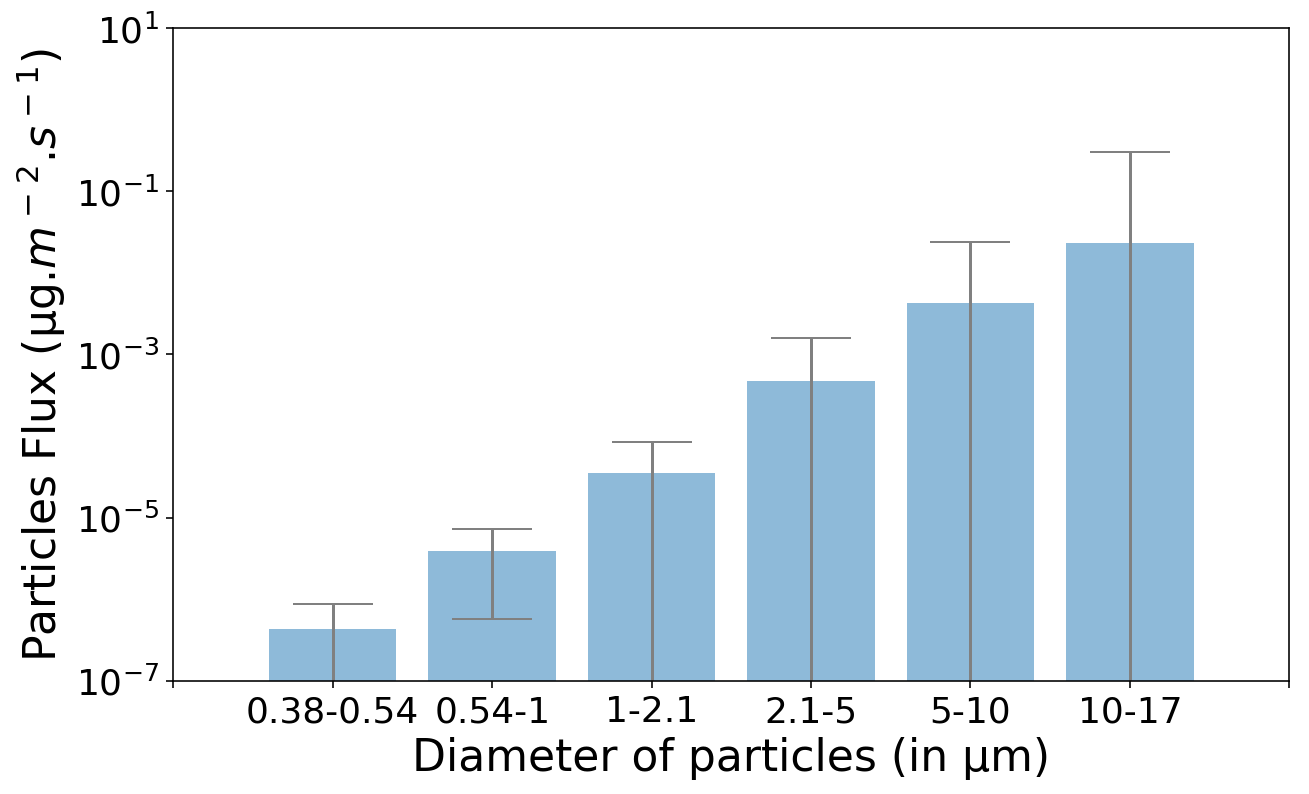

In [77]:
# Build the plot 
fig, ax = plt.subplots(figsize=(10, 6), dpi=144)

ax.bar(Index, Mean, yerr=Std, align='center', alpha=0.5, ecolor='grey', capsize=20)
ax.set_xticks(Index)
ax.yaxis.grid(True)
ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2e'))

ax.set_xlabel('Diameter of particles (in μm)', fontsize=22)
ax.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)', fontsize=22)

ax.tick_params(axis='x', labelsize=18)
ax.tick_params(axis='y', labelsize=18)
ax.grid(False)
ax.set_ylim(1e-7,10)
ax.set_yscale('log')

# To save the figure
plt.savefig('Fig7 - Particles flux - Mean and std @ '+ name, bbox_inches='tight')

In [78]:
# To correct the timestamp of the database:

dFlux6=Flux6.reset_index()
dFlux6['Date'] = dFlux6['Date'].astype('datetime64')
dFlux6 = dFlux6.set_index('Date')

Flux7=dFlux6.rename(columns = {'0.38-0.54':'0.38-0.54 μm','0.54-1':'0.54-1 μm','1-2.1':'1-2.1 μm','2.1-5':'2.1-5 μm','5-10':'5-10 μm','10-17':'10-17 μm'})
Flux7

Index,,0.38-0.54 μm,0.54-1 μm,1-2.1 μm,2.1-5 μm,5-10 μm,10-17 μm,
Date,,,,,,,,
2017-06-10 18:45:00,NaN,9.065493e-07,0.000004,0.000122,0.004319,0.041527,0.685631,NaN
2017-06-10 18:46:00,NaN,9.749377e-07,0.000006,0.000164,0.006231,0.063033,0.000000,NaN
2017-06-10 18:47:00,NaN,1.009115e-06,0.000006,0.000116,0.004845,0.014361,0.000000,NaN
2017-06-10 18:48:00,NaN,1.094599e-06,0.000004,0.000041,0.006220,0.027016,0.000000,NaN
2017-06-10 18:49:00,NaN,1.060359e-06,0.000005,0.000178,0.005709,0.039625,0.000000,NaN
...,...,...,...,...,...,...,...,...
2017-06-28 22:45:00,NaN,1.178163e-06,0.000006,0.000070,0.000661,0.023539,0.000000,NaN
2017-06-28 22:46:00,NaN,1.247521e-06,0.000008,0.000097,0.001321,0.005797,0.000000,NaN
2017-06-28 22:47:00,NaN,1.056974e-06,0.000005,0.000166,0.001107,0.029282,0.000000,NaN


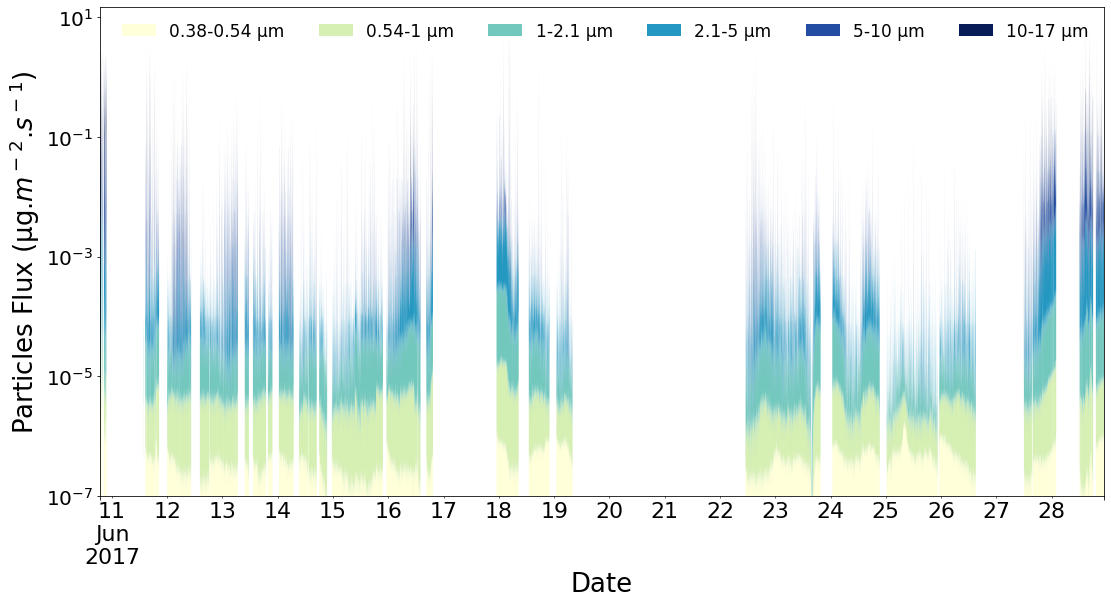

In [79]:
# To created the stacked plot of integrated fluxes

fig8 = Flux7[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']].plot.area(linewidth=0, colormap='YlGnBu',fontsize=22)
fig8.set_xlabel('Date',fontsize=26)
fig8.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)', fontsize=26)
fig8.grid(False)
fig8.legend(title='Particle size')
fig8.tick_params(axis='x', labelsize=18 )
fig8.tick_params(axis='y', labelsize=20 )
fig8.legend(frameon=False, ncol=6,prop={'size': 17})

fig8.set_ylim(1e-7,15)
fig8.set_yscale('log')

plt.savefig('Fig8 - Particle Fluxes during monitoring period stacked @' + name, bbox_inches='tight')

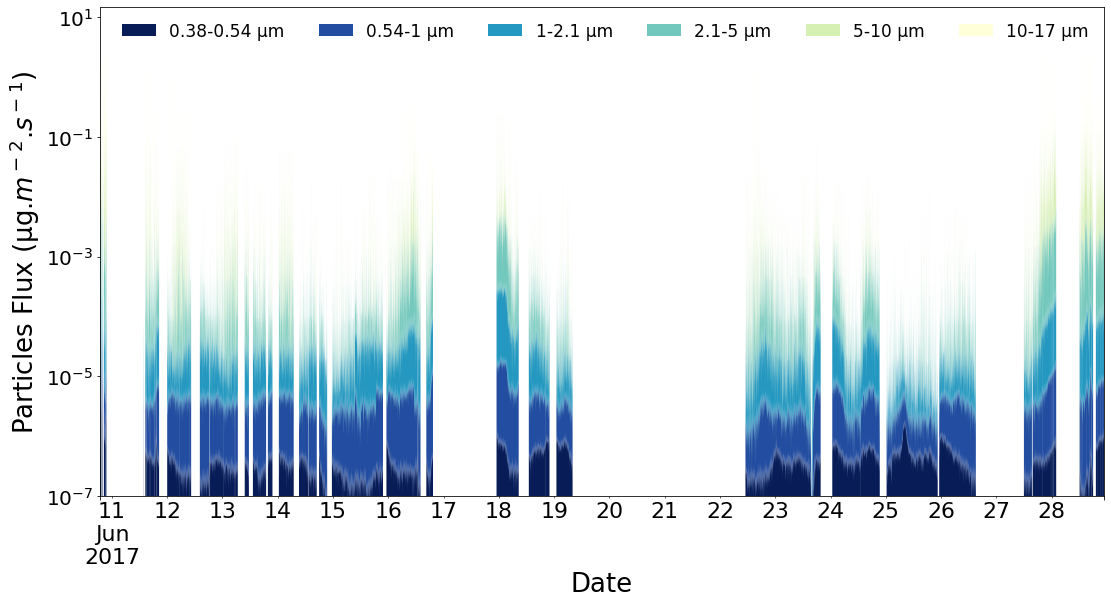

In [80]:
# To created the stacked plot of integrated fluxes


fig9 = Flux7[['0.38-0.54 μm','0.54-1 μm','1-2.1 μm','2.1-5 μm','5-10 μm','10-17 μm']].plot.area(linewidth=0, colormap='YlGnBu_r',fontsize=22)
fig9.set_xlabel('Date',fontsize=26)
fig9.set_ylabel('Particles Flux (μg.$m^-$$^2$.$s^-$$^1$)', fontsize=26)
fig9.grid(False)
fig9.legend(title='Particle size')
fig9.tick_params(axis='x', labelsize=18 )
fig9.tick_params(axis='y', labelsize=20 )
fig9.legend(frameon=False, ncol=6,prop={'size': 17})

fig9.set_ylim(1e-7,15)
fig9.set_yscale('log')

plt.savefig('Fig9 - Particle Fluxes during monitoring period stacked - inverted colors @ ' + name, bbox_inches='tight')